In [1]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals
# text in Western (Windows 1252)

import pickle
import numpy as np
# import StringIO
import math
from keras import optimizers, metrics
from keras.models import Model
from keras.layers import Dense, Dropout, Input
from keras.layers.merge import concatenate
from keras import regularizers
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.constraints import maxnorm
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.models import load_model
# from keras import backend as Input
np.random.seed(7)

Using Theano backend.


In [2]:
# %run ../../../prepare_data.py

import sys
sys.path.insert(0, '../../../')
from prepare_data import *

In [4]:
# %run ../../../prepare_data.py
# X_train, X_other_features_train, y_train, X_test, X_other_features_test, y_test, X_validate, X_other_features_validate, y_validate = generate_full_matrix_inputs('../../internal_representations/inputs/content_shuffle_vector.h5', '../../internal_representations/inputs/shuffle_vector')
# save_inputs('../../internal_representations/inputs/shuffeled_matrix_train_inputs_other_features_multilabel.h5', X_train, y_train, other_features = X_other_features_train)
# save_inputs('../../internal_representations/inputs/shuffeled_matrix_test_inputs_other_features_multilabel.h5', X_test, y_test, other_features = X_other_features_test)
# save_inputs('../../internal_representations/inputs/shuffeled_matrix_validate_inputs_other_features_multilabel.h5', X_validate, y_validate,  other_features = X_other_features_validate)
X_train, X_other_features_train, y_train = load_inputs('../../internal_representations/inputs/shuffeled_matrix_train_inputs_other_features_multilabel.h5', other_features=True)
X_test, X_other_features_test, y_test = load_inputs('../../internal_representations/inputs/shuffeled_matrix_test_inputs_other_features_multilabel.h5', other_features=True)
X_validate, X_other_features_validate, y_validate = load_inputs('../../internal_representations/inputs/shuffeled_matrix_validate_inputs_other_features_multilabel.h5', other_features=True)

In [9]:
print (X_train.shape)
print (X_test.shape)
print (X_validate.shape)
# X_other_features = create_X_features(content)
# print (X_other_features[178200])
decode_position = 38
print (decode_input(X_validate[decode_position], dictionary))
# print (X_other_features_train[0])
print (decode_X_features(feature_dictionary, [X_other_features_train[decode_position]]))
# print (len(X_other_features_train[0]))

(430151, 23, 30)
(52058, 23, 30)
(54222, 23, 30)
najslajši
Agpndi-
Agpndi-


In [25]:
num_examples = len(X_train) # training set size
# nn_input_dim = max_word * len(dictionary) # input layer dimensionality
# nn_output_dim = max_num_vowels * max_num_vowels # output layer dimensionality
nn_output_dim = 11
nn_hdim = 516
batch_size = 16
actual_epoch = 40
num_fake_epoch = 20

# Gradient descent parameters (I picked these by hand)
# epsilon = 1 # learning rate for gradient descent
# reg_lambda = 1 # regularization strength

In [30]:
conv_input_shape=(23, 30)
othr_input = (140, )

conv_input = Input(shape=conv_input_shape, name='conv_input')
x_conv = Conv1D(23, (3), padding='same', activation='relu')(conv_input)
x_conv = Conv1D(46, (3), padding='same', activation='relu')(x_conv)
x_conv = MaxPooling1D(pool_size=2)(x_conv)
x_conv = Flatten()(x_conv)
# x_conv = Dense(516, activation='relu', kernel_constraint=maxnorm(3))(x_conv)

othr_input = Input(shape=othr_input, name='othr_input')
# x_othr = Dense(256, input_dim=167, activation='relu')(othr_input)
# x_othr = Dropout(0.3)(x_othr)
# x_othr = Dense(512, activation='relu')(othr_input)
# x_othr = Dropout(0.3)(x_othr)
# x_othr = Dense(256, activation='relu')(othr_input)

x = concatenate([x_conv, othr_input])
# x = Dense(1024, input_dim=(516 + 256), activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(nn_output_dim, activation='sigmoid')(x)

In [31]:
model = Model(inputs=[conv_input, othr_input], outputs=x)

# epochs = 5
# lrate = 0.1
# decay = lrate/epochs
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Compile model
# keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
opt = optimizers.Adam(lr=1E-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=[actual_accuracy,])
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [32]:
history = model.fit_generator(generate_fake_epoch(X_train, X_other_features_train, y_train, batch_size), X_train.shape[0]/(batch_size * num_fake_epoch), epochs=actual_epoch*num_fake_epoch, validation_data=([X_test, X_other_features_test], y_test))

# model.fit([X_train, X_other_features_train], y_train, validation_data=([X_validate, X_other_features_validate], y_validate), epochs=1, batch_size=16)

Epoch 1/800
1345/1344 [==============================] - 28s - loss: 0.2156 - actual_accuracy: 0.2148 - val_loss: 0.1632 - val_actual_accuracy: 0.4928
Epoch 2/800
1345/1344 [==============================] - 25s - loss: 0.1564 - actual_accuracy: 0.4474 - val_loss: 0.1476 - val_actual_accuracy: 0.5365
Epoch 3/800
1345/1344 [==============================] - 22s - loss: 0.1395 - actual_accuracy: 0.5232 - val_loss: 0.1331 - val_actual_accuracy: 0.6021
Epoch 4/800
1345/1344 [==============================] - 25s - loss: 0.1242 - actual_accuracy: 0.5996 - val_loss: 0.1168 - val_actual_accuracy: 0.6778
Epoch 5/800
1345/1344 [==============================] - 24s - loss: 0.1143 - actual_accuracy: 0.6480 - val_loss: 0.1102 - val_actual_accuracy: 0.7053
Epoch 6/800
1345/1344 [==============================] - 25s - loss: 0.1077 - actual_accuracy: 0.6876 - val_loss: 0.1054 - val_actual_accuracy: 0.7222
Epoch 7/800
1345/1344 [==============================] - 25s - loss: 0.1008 - actual_accuracy:

1345/1344 [==============================] - 27s - loss: 0.0381 - actual_accuracy: 0.9026 - val_loss: 0.0953 - val_actual_accuracy: 0.8399
Epoch 55/800
1345/1344 [==============================] - 26s - loss: 0.0377 - actual_accuracy: 0.9058 - val_loss: 0.0905 - val_actual_accuracy: 0.8361
Epoch 56/800
1345/1344 [==============================] - 27s - loss: 0.0361 - actual_accuracy: 0.9099 - val_loss: 0.0925 - val_actual_accuracy: 0.8389
Epoch 57/800
1345/1344 [==============================] - 27s - loss: 0.0349 - actual_accuracy: 0.9123 - val_loss: 0.0945 - val_actual_accuracy: 0.8439
Epoch 58/800
1345/1344 [==============================] - 27s - loss: 0.0346 - actual_accuracy: 0.9132 - val_loss: 0.1008 - val_actual_accuracy: 0.8414
Epoch 59/800
1345/1344 [==============================] - 27s - loss: 0.0349 - actual_accuracy: 0.9117 - val_loss: 0.0954 - val_actual_accuracy: 0.8329
Epoch 60/800
1345/1344 [==============================] - 26s - loss: 0.0346 - actual_accuracy: 0.913

1345/1344 [==============================] - 28s - loss: 0.0220 - actual_accuracy: 0.9456 - val_loss: 0.1197 - val_actual_accuracy: 0.8461
Epoch 108/800
1345/1344 [==============================] - 27s - loss: 0.0230 - actual_accuracy: 0.9453 - val_loss: 0.1110 - val_actual_accuracy: 0.8515
Epoch 109/800
1345/1344 [==============================] - 27s - loss: 0.0216 - actual_accuracy: 0.9468 - val_loss: 0.1187 - val_actual_accuracy: 0.8450
Epoch 110/800
1345/1344 [==============================] - 27s - loss: 0.0216 - actual_accuracy: 0.9473 - val_loss: 0.1149 - val_actual_accuracy: 0.8547
Epoch 111/800
1345/1344 [==============================] - 26s - loss: 0.0218 - actual_accuracy: 0.9467 - val_loss: 0.1042 - val_actual_accuracy: 0.8553
Epoch 112/800
1345/1344 [==============================] - 26s - loss: 0.0213 - actual_accuracy: 0.9483 - val_loss: 0.1216 - val_actual_accuracy: 0.8462
Epoch 113/800
1345/1344 [==============================] - 27s - loss: 0.0207 - actual_accuracy:

1345/1344 [==============================] - 27s - loss: 0.0168 - actual_accuracy: 0.9601 - val_loss: 0.1182 - val_actual_accuracy: 0.8586
Epoch 161/800
1345/1344 [==============================] - 30s - loss: 0.0159 - actual_accuracy: 0.9620 - val_loss: 0.1388 - val_actual_accuracy: 0.8507
Epoch 162/800
1345/1344 [==============================] - 27s - loss: 0.0167 - actual_accuracy: 0.9594 - val_loss: 0.1332 - val_actual_accuracy: 0.8509
Epoch 163/800
1345/1344 [==============================] - 27s - loss: 0.0168 - actual_accuracy: 0.9614 - val_loss: 0.1305 - val_actual_accuracy: 0.8556
Epoch 164/800
1345/1344 [==============================] - 26s - loss: 0.0165 - actual_accuracy: 0.9605 - val_loss: 0.1237 - val_actual_accuracy: 0.8564
Epoch 165/800
1345/1344 [==============================] - 29s - loss: 0.0164 - actual_accuracy: 0.9611 - val_loss: 0.1217 - val_actual_accuracy: 0.8561
Epoch 166/800
1345/1344 [==============================] - 27s - loss: 0.0147 - actual_accuracy:

1345/1344 [==============================] - 27s - loss: 0.0129 - actual_accuracy: 0.9684 - val_loss: 0.1294 - val_actual_accuracy: 0.8576
Epoch 214/800
1345/1344 [==============================] - 28s - loss: 0.0132 - actual_accuracy: 0.9686 - val_loss: 0.1401 - val_actual_accuracy: 0.8501
Epoch 215/800
1345/1344 [==============================] - 30s - loss: 0.0135 - actual_accuracy: 0.9682 - val_loss: 0.1421 - val_actual_accuracy: 0.8575
Epoch 216/800
1345/1344 [==============================] - 28s - loss: 0.0126 - actual_accuracy: 0.9705 - val_loss: 0.1392 - val_actual_accuracy: 0.8644
Epoch 217/800
1345/1344 [==============================] - 27s - loss: 0.0124 - actual_accuracy: 0.9708 - val_loss: 0.1358 - val_actual_accuracy: 0.8491
Epoch 218/800
1345/1344 [==============================] - 28s - loss: 0.0135 - actual_accuracy: 0.9691 - val_loss: 0.1349 - val_actual_accuracy: 0.8608
Epoch 219/800
1345/1344 [==============================] - 28s - loss: 0.0136 - actual_accuracy:

1345/1344 [==============================] - 25s - loss: 0.0110 - actual_accuracy: 0.9741 - val_loss: 0.1346 - val_actual_accuracy: 0.8612
Epoch 267/800
1345/1344 [==============================] - 27s - loss: 0.0110 - actual_accuracy: 0.9747 - val_loss: 0.1345 - val_actual_accuracy: 0.8622
Epoch 268/800
1345/1344 [==============================] - 26s - loss: 0.0111 - actual_accuracy: 0.9736 - val_loss: 0.1331 - val_actual_accuracy: 0.8613
Epoch 269/800
1345/1344 [==============================] - 26s - loss: 0.0112 - actual_accuracy: 0.9743 - val_loss: 0.1448 - val_actual_accuracy: 0.8555
Epoch 270/800
1345/1344 [==============================] - 27s - loss: 0.0111 - actual_accuracy: 0.9728 - val_loss: 0.1386 - val_actual_accuracy: 0.8543
Epoch 271/800
1345/1344 [==============================] - 27s - loss: 0.0107 - actual_accuracy: 0.9739 - val_loss: 0.1440 - val_actual_accuracy: 0.8579
Epoch 272/800
1345/1344 [==============================] - 27s - loss: 0.0107 - actual_accuracy:

1345/1344 [==============================] - 26s - loss: 0.0102 - actual_accuracy: 0.9778 - val_loss: 0.1435 - val_actual_accuracy: 0.8626
Epoch 320/800
1345/1344 [==============================] - 27s - loss: 0.0099 - actual_accuracy: 0.9767 - val_loss: 0.1318 - val_actual_accuracy: 0.8585
Epoch 321/800
1345/1344 [==============================] - 30s - loss: 0.0095 - actual_accuracy: 0.9772 - val_loss: 0.1341 - val_actual_accuracy: 0.8656
Epoch 322/800
1345/1344 [==============================] - 27s - loss: 0.0101 - actual_accuracy: 0.9768 - val_loss: 0.1548 - val_actual_accuracy: 0.8559
Epoch 323/800
1345/1344 [==============================] - 28s - loss: 0.0102 - actual_accuracy: 0.9764 - val_loss: 0.1463 - val_actual_accuracy: 0.8629
Epoch 324/800
1345/1344 [==============================] - 26s - loss: 0.0096 - actual_accuracy: 0.9774 - val_loss: 0.1425 - val_actual_accuracy: 0.8617
Epoch 325/800
1345/1344 [==============================] - 26s - loss: 0.0100 - actual_accuracy:

1345/1344 [==============================] - 27s - loss: 0.0088 - actual_accuracy: 0.9816 - val_loss: 0.1339 - val_actual_accuracy: 0.8668
Epoch 373/800
1345/1344 [==============================] - 27s - loss: 0.0090 - actual_accuracy: 0.9785 - val_loss: 0.1375 - val_actual_accuracy: 0.8687
Epoch 374/800
1345/1344 [==============================] - 25s - loss: 0.0096 - actual_accuracy: 0.9790 - val_loss: 0.1515 - val_actual_accuracy: 0.8594
Epoch 375/800
1345/1344 [==============================] - 26s - loss: 0.0091 - actual_accuracy: 0.9789 - val_loss: 0.1440 - val_actual_accuracy: 0.8554
Epoch 376/800
1345/1344 [==============================] - 25s - loss: 0.0091 - actual_accuracy: 0.9796 - val_loss: 0.1382 - val_actual_accuracy: 0.8625
Epoch 377/800
1345/1344 [==============================] - 29s - loss: 0.0078 - actual_accuracy: 0.9811 - val_loss: 0.1499 - val_actual_accuracy: 0.8644
Epoch 378/800
1345/1344 [==============================] - 28s - loss: 0.0088 - actual_accuracy:

1345/1344 [==============================] - 25s - loss: 0.0083 - actual_accuracy: 0.9807 - val_loss: 0.1434 - val_actual_accuracy: 0.8599
Epoch 426/800
1345/1344 [==============================] - 27s - loss: 0.0078 - actual_accuracy: 0.9824 - val_loss: 0.1560 - val_actual_accuracy: 0.8568
Epoch 427/800
1345/1344 [==============================] - 26s - loss: 0.0080 - actual_accuracy: 0.9815 - val_loss: 0.1363 - val_actual_accuracy: 0.8662
Epoch 428/800
1345/1344 [==============================] - 25s - loss: 0.0083 - actual_accuracy: 0.9804 - val_loss: 0.1357 - val_actual_accuracy: 0.8669
Epoch 429/800
1345/1344 [==============================] - 26s - loss: 0.0076 - actual_accuracy: 0.9827 - val_loss: 0.1434 - val_actual_accuracy: 0.8624
Epoch 430/800
1345/1344 [==============================] - 26s - loss: 0.0088 - actual_accuracy: 0.9796 - val_loss: 0.1512 - val_actual_accuracy: 0.8608
Epoch 431/800
1345/1344 [==============================] - 25s - loss: 0.0077 - actual_accuracy:

1345/1344 [==============================] - 26s - loss: 0.0077 - actual_accuracy: 0.9829 - val_loss: 0.1490 - val_actual_accuracy: 0.8633
Epoch 479/800
1345/1344 [==============================] - 26s - loss: 0.0073 - actual_accuracy: 0.9829 - val_loss: 0.1499 - val_actual_accuracy: 0.8660
Epoch 480/800
1345/1344 [==============================] - 26s - loss: 0.0074 - actual_accuracy: 0.9833 - val_loss: 0.1422 - val_actual_accuracy: 0.8624
Epoch 481/800
1345/1344 [==============================] - 26s - loss: 0.0077 - actual_accuracy: 0.9824 - val_loss: 0.1289 - val_actual_accuracy: 0.8594
Epoch 482/800
1345/1344 [==============================] - 26s - loss: 0.0078 - actual_accuracy: 0.9828 - val_loss: 0.1302 - val_actual_accuracy: 0.8660
Epoch 483/800
1345/1344 [==============================] - 25s - loss: 0.0074 - actual_accuracy: 0.9824 - val_loss: 0.1330 - val_actual_accuracy: 0.8624
Epoch 484/800
1345/1344 [==============================] - 26s - loss: 0.0069 - actual_accuracy:

1345/1344 [==============================] - 28s - loss: 0.0073 - actual_accuracy: 0.9837 - val_loss: 0.1411 - val_actual_accuracy: 0.8650
Epoch 532/800
1345/1344 [==============================] - 28s - loss: 0.0070 - actual_accuracy: 0.9850 - val_loss: 0.1404 - val_actual_accuracy: 0.8665
Epoch 533/800
1345/1344 [==============================] - 28s - loss: 0.0072 - actual_accuracy: 0.9849 - val_loss: 0.1443 - val_actual_accuracy: 0.8597
Epoch 534/800
1345/1344 [==============================] - 29s - loss: 0.0071 - actual_accuracy: 0.9849 - val_loss: 0.1401 - val_actual_accuracy: 0.8616
Epoch 535/800
1345/1344 [==============================] - 27s - loss: 0.0072 - actual_accuracy: 0.9838 - val_loss: 0.1467 - val_actual_accuracy: 0.8654
Epoch 536/800
1345/1344 [==============================] - 29s - loss: 0.0076 - actual_accuracy: 0.9839 - val_loss: 0.1551 - val_actual_accuracy: 0.8671
Epoch 537/800
1345/1344 [==============================] - 27s - loss: 0.0067 - actual_accuracy:

1345/1344 [==============================] - 33s - loss: 0.0071 - actual_accuracy: 0.9834 - val_loss: 0.1393 - val_actual_accuracy: 0.8663
Epoch 585/800
1345/1344 [==============================] - 34s - loss: 0.0068 - actual_accuracy: 0.9840 - val_loss: 0.1484 - val_actual_accuracy: 0.8659
Epoch 586/800
1345/1344 [==============================] - 35s - loss: 0.0076 - actual_accuracy: 0.9827 - val_loss: 0.1329 - val_actual_accuracy: 0.8650
Epoch 587/800
1345/1344 [==============================] - 35s - loss: 0.0065 - actual_accuracy: 0.9853 - val_loss: 0.1397 - val_actual_accuracy: 0.8665
Epoch 588/800
1345/1344 [==============================] - 33s - loss: 0.0071 - actual_accuracy: 0.9836 - val_loss: 0.1357 - val_actual_accuracy: 0.8632
Epoch 589/800
1345/1344 [==============================] - 33s - loss: 0.0069 - actual_accuracy: 0.9844 - val_loss: 0.1335 - val_actual_accuracy: 0.8685
Epoch 590/800
1345/1344 [==============================] - 34s - loss: 0.0068 - actual_accuracy:

1345/1344 [==============================] - 32s - loss: 0.0066 - actual_accuracy: 0.9865 - val_loss: 0.1413 - val_actual_accuracy: 0.8676
Epoch 638/800
1345/1344 [==============================] - 31s - loss: 0.0069 - actual_accuracy: 0.9847 - val_loss: 0.1258 - val_actual_accuracy: 0.8665
Epoch 639/800
1345/1344 [==============================] - 31s - loss: 0.0068 - actual_accuracy: 0.9853 - val_loss: 0.1516 - val_actual_accuracy: 0.8663
Epoch 640/800
1345/1344 [==============================] - 33s - loss: 0.0067 - actual_accuracy: 0.9844 - val_loss: 0.1358 - val_actual_accuracy: 0.8632
Epoch 641/800
1345/1344 [==============================] - 32s - loss: 0.0067 - actual_accuracy: 0.9862 - val_loss: 0.1361 - val_actual_accuracy: 0.8708
Epoch 642/800
1345/1344 [==============================] - 31s - loss: 0.0073 - actual_accuracy: 0.9832 - val_loss: 0.1271 - val_actual_accuracy: 0.8691
Epoch 643/800
1345/1344 [==============================] - 32s - loss: 0.0065 - actual_accuracy:

1345/1344 [==============================] - 30s - loss: 0.0065 - actual_accuracy: 0.9849 - val_loss: 0.1432 - val_actual_accuracy: 0.8673
Epoch 691/800
1345/1344 [==============================] - 30s - loss: 0.0063 - actual_accuracy: 0.9857 - val_loss: 0.1415 - val_actual_accuracy: 0.8639
Epoch 692/800
1345/1344 [==============================] - 33s - loss: 0.0061 - actual_accuracy: 0.9862 - val_loss: 0.1459 - val_actual_accuracy: 0.8675
Epoch 693/800
1345/1344 [==============================] - 34s - loss: 0.0065 - actual_accuracy: 0.9861 - val_loss: 0.1373 - val_actual_accuracy: 0.8700
Epoch 694/800
1345/1344 [==============================] - 35s - loss: 0.0072 - actual_accuracy: 0.9854 - val_loss: 0.1430 - val_actual_accuracy: 0.8671
Epoch 695/800
1345/1344 [==============================] - 33s - loss: 0.0067 - actual_accuracy: 0.9855 - val_loss: 0.1408 - val_actual_accuracy: 0.8683
Epoch 696/800
1345/1344 [==============================] - 32s - loss: 0.0066 - actual_accuracy:

1345/1344 [==============================] - 30s - loss: 0.0061 - actual_accuracy: 0.9861 - val_loss: 0.1497 - val_actual_accuracy: 0.8714
Epoch 744/800
1345/1344 [==============================] - 31s - loss: 0.0066 - actual_accuracy: 0.9857 - val_loss: 0.1562 - val_actual_accuracy: 0.8688
Epoch 745/800
1345/1344 [==============================] - 31s - loss: 0.0063 - actual_accuracy: 0.9857 - val_loss: 0.1374 - val_actual_accuracy: 0.8724
Epoch 746/800
1345/1344 [==============================] - 34s - loss: 0.0061 - actual_accuracy: 0.9863 - val_loss: 0.1352 - val_actual_accuracy: 0.8721
Epoch 747/800
1345/1344 [==============================] - 34s - loss: 0.0060 - actual_accuracy: 0.9872 - val_loss: 0.1393 - val_actual_accuracy: 0.8611
Epoch 748/800
1345/1344 [==============================] - 31s - loss: 0.0061 - actual_accuracy: 0.9860 - val_loss: 0.1406 - val_actual_accuracy: 0.8687
Epoch 749/800
1345/1344 [==============================] - 35s - loss: 0.0062 - actual_accuracy:

1345/1344 [==============================] - 31s - loss: 0.0063 - actual_accuracy: 0.9858 - val_loss: 0.1526 - val_actual_accuracy: 0.8661
Epoch 797/800
1345/1344 [==============================] - 34s - loss: 0.0062 - actual_accuracy: 0.9874 - val_loss: 0.1351 - val_actual_accuracy: 0.8742
Epoch 798/800
1345/1344 [==============================] - 33s - loss: 0.0060 - actual_accuracy: 0.9866 - val_loss: 0.1391 - val_actual_accuracy: 0.8730
Epoch 799/800
1345/1344 [==============================] - 31s - loss: 0.0060 - actual_accuracy: 0.9874 - val_loss: 0.1463 - val_actual_accuracy: 0.8741
Epoch 800/800
1345/1344 [==============================] - 30s - loss: 0.0064 - actual_accuracy: 0.9857 - val_loss: 0.1498 - val_actual_accuracy: 0.8710


In [29]:
name = '40_epoch'
model.save(name + '.h5')
output = open(name + '_history.pkl', 'wb')
pickle.dump(history.history, output)
output.close()

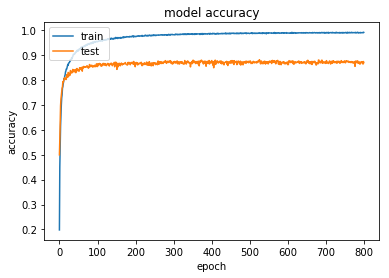

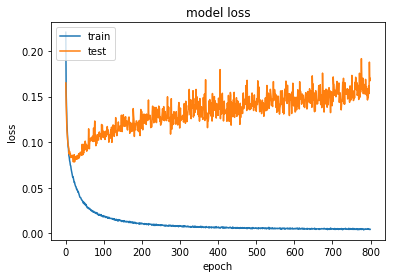

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['actual_accuracy'])
plt.plot(history.history['val_actual_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
model = load_model('test.h5')

In [6]:
h5f.close()

NameError: name 'h5f' is not defined

In [67]:
# evaluate the model
scores = model.evaluate([X_validate, X_other_features_validate], y_validate)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

108736/108961 [============================>.] - ETA: 0s
acc: 96.57%


In [187]:
pos = 0
print(decode_input(X_validate[pos], dictionary))
# predictions = model.predict([X_validate, X_other_features_validate])
predictions2 = model.predict([X_validate[pos:pos+1], X_other_features_validate[pos:pos+1]])
# print(predictions2)
print(np.round(predictions2)[0])
# predictions = np.round(predictions)
print(y_validate[pos])
# accuracy = sum([1 if np.all(y_validate[i] == predictions[i]) else 0 for i in range(X_validate.shape[0])])/float(X_validate.shape[0])
# print(accuracy)


import keras.backend as K

def act_accuracy(y_true, y_pred):
    return K.mean(K.equal(K.mean(K.equal(K.round(y_true), K.round(y_pred)), axis=-1), 1.0))


def mean_pred2(y_true, y_pred):
    return K.mean(K.equal(K.argmax(y_true, axis=-1), K.argmax(y_pred, axis=-1)))
#     return K.mean(K.all(K.equal(y_true, y_pred), axis=-1))
#     return K.equal(K.round(y_true), K.round(y_pred))

print(mean_pred(y_validate[pos], predictions[pos]).eval())
print(mean_pred(np.array([[ 0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
                          [ 0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]), 
                np.array([[ 0.,  0.51,  0.,  0.51,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
                          [ 0.,  0.92,  0.,  0.51,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])).eval())
# print(mean_pred(y_validate[pos], predictions[pos]))
# print(mean_pred2(y_validate[pos], predictions[pos]))
print(metrics.categorical_accuracy(y_validate[pos], predictions[pos]))

nerazloènejši
[ 0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
1.0
1.0
Elemwise{Cast{float32}}.0


In [ ]:
predictions = model.predict(X[429145:])

In [21]:
decode_position(predictions[0], max_num_vowels)

[1, 0]

In [23]:
def test_accuracy(predictions, y):
    dictionary, max_word, max_num_vowels, content, vowels, accetuated_vowels = create_dict()
    num_of_pred = len(predictions)
    num_of_correct_pred = 0
    for i in range(predictions.shape[0]):
        if decode_position(predictions[i], max_num_vowels) == decode_position(y[i], max_num_vowels):
            num_of_correct_pred += 1

    return (num_of_correct_pred/float(num_of_pred)) * 100


print(test_accuracy(predictions, y[429145:]))

READING CONTENT...
CONTENT READ SUCCESSFULY
CREATING DICTIONARY...
DICTIONARY CREATION SUCCESSFUL!
107287
96.5186835311


In [17]:
predictions.shape

(107287, 121)

In [12]:
print max_num_vowels

11


In [6]:
dictionary, max_word, max_num_vowels, content, vowels, accetuated_vowels = create_dict()
feature_dictionary = create_feature_dictionary()
def generate_input_from_word(word, max_word, dictionary):
    x = np.zeros((max_word, len(dictionary)))
    j = 0
    for c in list(word):
        index = 0
        for d in dictionary:
            if c == d:
                x[j, index] = 1
                break
            index += 1
        j += 1
    return x

# model = load_model()
# prediction = predict(model, generate_input_from_word('hidrija'))
# print decode_position(prediction[0])

READING CONTENT...
CONTENT READ SUCCESSFULY
CREATING DICTIONARY...
DICTIONARY CREATION SUCCESSFUL!


In [6]:
%run ../../../prepare_data.py
# generate_X_and_y(dictionary, max_word, max_num_vowels, content, vowels, accetuated_vowels, feature_dictionary)